The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016.

In [5]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

nobel = pd.read_csv("Datasets/nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [6]:
nobel['sex'].value_counts()

sex
Male      836
Female     49
Name: count, dtype: int64

In [4]:
nobel['birth_country'].value_counts().head(10)

birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: count, dtype: int64

In [20]:
# USA dominance
nobel["usa_born_winner"] = nobel["birth_country"] == "United States of America"
nobel["decade"] = (np.floor(nobel["year"] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


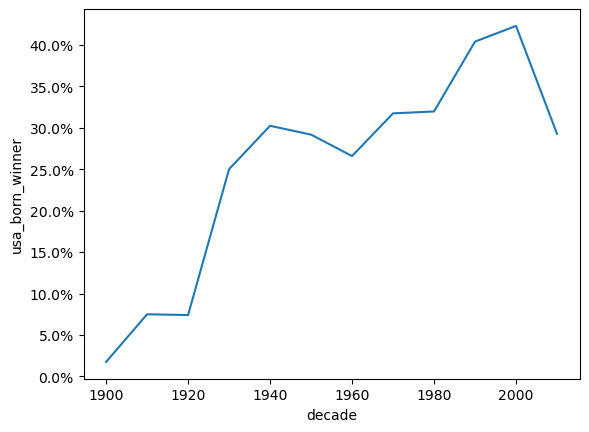

In [23]:
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [ ]:
nobel["female_winner"] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()


In [74]:
sex_counts = nobel.groupby(["sex", "decade"]).agg({"sex" : "count"})
sex_counts.columns = ["count"]

sex_counts.reset_index()


,sex,decade,count
0,Female,1900,3
1,Female,1910,1
2,Female,1920,2
3,Female,1930,3
4,Female,1940,3
5,Female,1960,3
6,Female,1970,4
7,Female,1980,4
8,Female,1990,7
9,Female,2000,11


<Axes: xlabel='decade'>

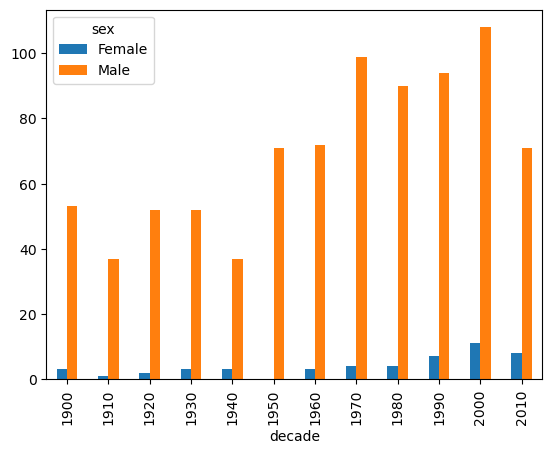

In [78]:
counts_wide = sex_counts.pivot_table(index='decade', columns='sex', values='count', fill_value=0)
counts_wide.plot(kind="bar")

In [80]:
nobel["female_winner"] = nobel["sex"] == "Female"
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

prop_female_winners

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000


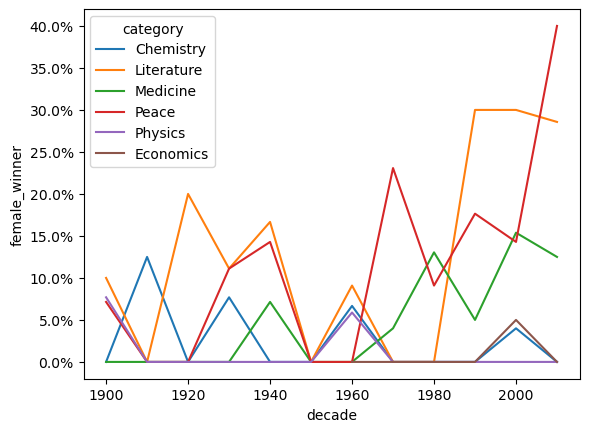

In [82]:
ax = sns.lineplot(x="decade", y="female_winner", hue="category", data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

In [83]:
# first woman to win a Nobel Prize
nobel[nobel.sex == "Female"].nsmallest(1, "year")

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [84]:
# first woman to win a Nobel Prize
nobel[nobel.sex == "Female"].sort_values("year").head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


In [96]:
# Repeat winners
nobel.groupby("full_name").filter(lambda group: len(group) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


In [117]:
repeat_winners = nobel["full_name"].value_counts().sort_values(ascending=False)
repeat_winners.columns = ["count"]
repeat_winners = repeat_winners.reset_index()
repeat_winners = repeat_winners[repeat_winners["count"] > 1]
repeat_winners

,full_name,count
0,Comité international de la Croix Rouge (Intern...,3
1,John Bardeen,2
2,Linus Carl Pauling,2
3,Frederick Sanger,2
4,"Marie Curie, née Sklodowska",2
5,Office of the United Nations High Commissioner...,2


/Users/betulyilmaz/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


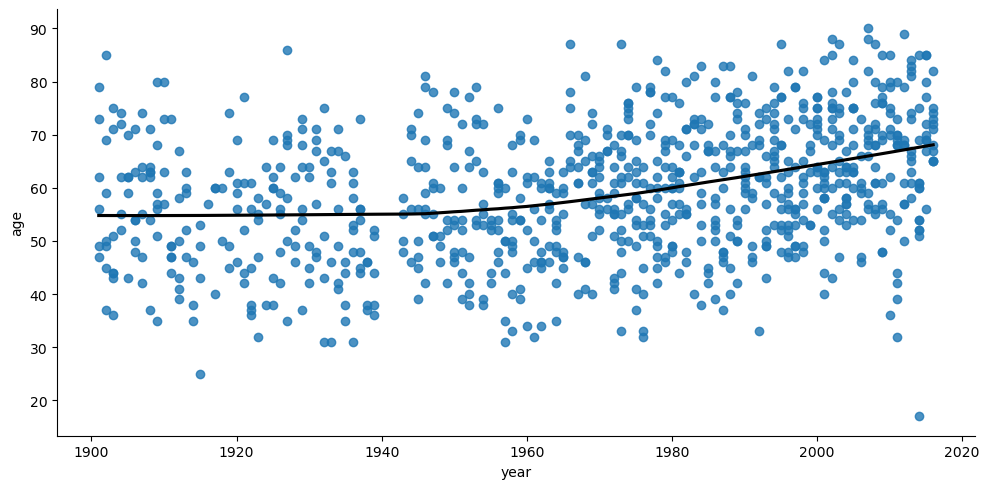

In [124]:
nobel["birth_date"] = pd.to_datetime(nobel["birth_date"])
nobel["age"] = nobel["year"] - nobel["birth_date"].dt.year

sns.lmplot(x="year", y="age", data=nobel, aspect=2, line_kws={"color":"black"},lowess=True)

We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65.

We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945)

/Users/betulyilmaz/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


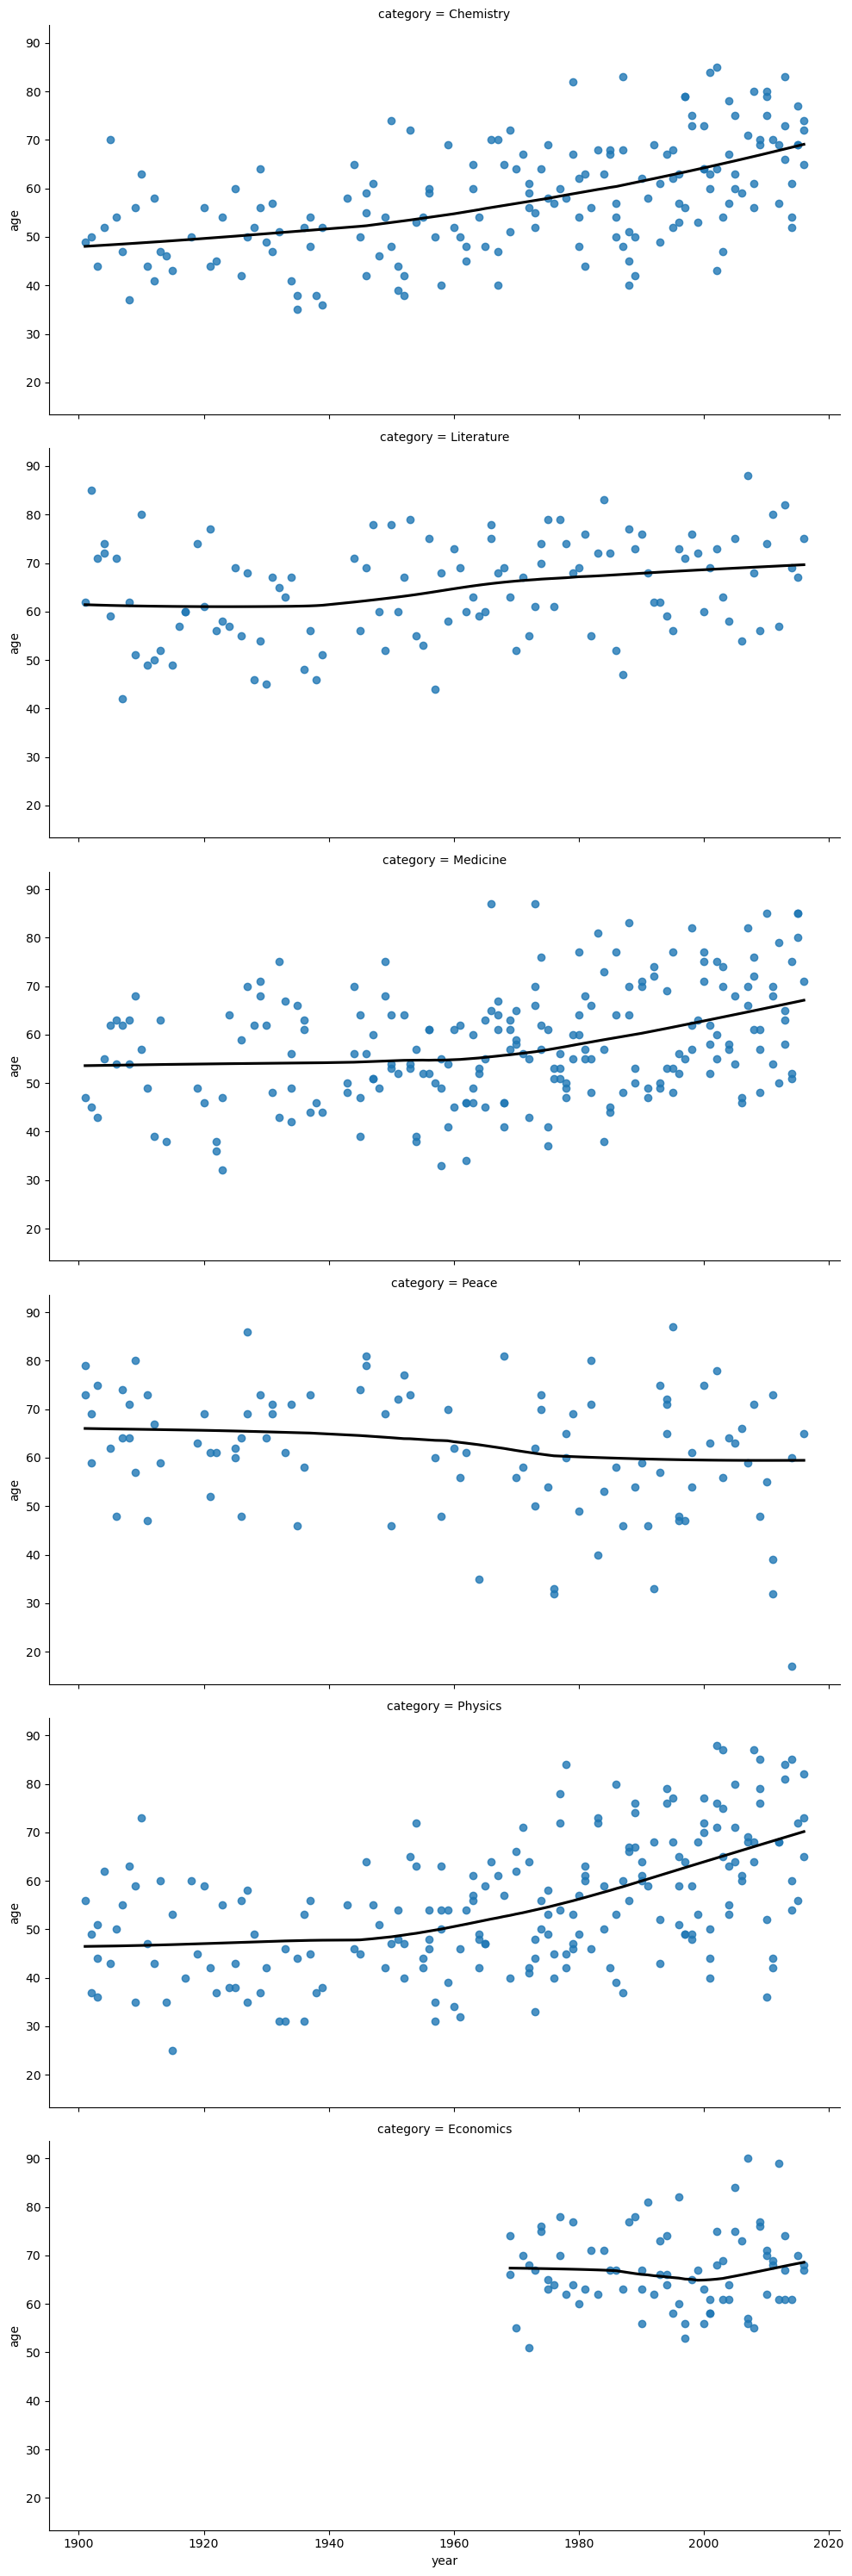

In [128]:
sns.lmplot(x="year", y="age", row="category", data=nobel, aspect=2, line_kws={"color":"black"},lowess=True)

In [129]:
# youngest winner
nobel.sort_values("age").head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,21,Individual,William Lawrence Bragg,1890-03-31,Adelaide,...,Victoria University,Manchester,United Kingdom,1971-07-01,Ipswich,United Kingdom,False,1910,False,25.0
166,1932,Physics,The Nobel Prize in Physics 1932,"""for the creation of quantum mechanics, the ap...",1/1,38,Individual,Werner Karl Heisenberg,1901-12-05,Würzburg,...,Leipzig University,Leipzig,Germany,1976-02-01,Munich,West Germany (Germany),False,1930,False,31.0
305,1957,Physics,The Nobel Prize in Physics 1957,"""for their penetrating investigation of the so...",1/2,69,Individual,Tsung-Dao (T.D.) Lee,1926-11-24,Shanghai,...,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN,False,1950,False,31.0
171,1933,Physics,The Nobel Prize in Physics 1933,"""for the discovery of new productive forms of ...",1/2,40,Individual,Paul Adrien Maurice Dirac,1902-08-08,Bristol,...,University of Cambridge,Cambridge,United Kingdom,1984-10-20,"Tallahassee, FL",United States of America,False,1930,False,31.0


In [130]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
